In [13]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Download datset

In [3]:
ROOT_DATA_DIR='FashionMNISTDir'

train_data = datasets.FashionMNIST(
    root = ROOT_DATA_DIR,
    train=True,
    download=True,
    transform = transforms.ToTensor()
)

test_data = datasets.FashionMNIST(
    root =ROOT_DATA_DIR,
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNISTDir/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNISTDir/FashionMNIST/raw



In [4]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [5]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [6]:
label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3:' Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
    }

# Visualize One Example

In [7]:
def view_image(data, index, label_map):
  plt.imshow(data.data[index], cmap='gray')
  plt.title(f"data label: {label_map[data.targets[index].item()]}")
  plt.axis("off")

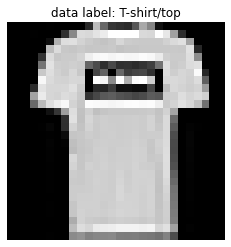

In [12]:
view_image(train_data, index=1, label_map=label_map)

# Create dataloader

In [17]:
BATCH_SIZE=64

train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle=True
)

test_data_loader = DataLoader(
    dataset = test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [18]:
for data, label in test_data_loader:
  print(data.shape)
  print(label.shape)
  break

torch.Size([64, 1, 28, 28])
torch.Size([64])
